In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#讀入tensorflow

In [3]:
import tensorflow as tf

## 讀入Mnsit數據集

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

### 2.查看數據集內容

### Labels
Each training and test example is assigned to one of the following labels:
0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
x_train[1450]

array([[  0,   0,   0,   0,   0,   0,   0,   2,   1,   0,   0,   0,   0,
         64,   0, 136,   5,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,  74,  78,
        151, 193, 113, 103,  17,  37,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  94, 106, 219, 125,
         74, 203, 158,  52, 148, 191,  84,   4,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 118, 115, 183, 127,
         40, 144, 203,  18, 167, 137, 118,   4,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 190, 138, 169, 137,
         55, 173, 199,  22, 206, 115, 156,  65,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   7, 211, 138, 174, 147,
         56, 159, 247,  37, 179,  87, 134, 105,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train[1450]

3

正確答案： 3


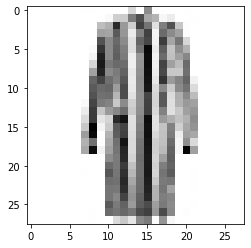

In [10]:
plt.imshow(x_train[1450],cmap='Greys')
print('正確答案：',y_train[1450])

## 3.資料整理

In [11]:
x_train=x_train/255
x_test=x_test/255

In [12]:
x_test.shape

(10000, 28, 28)

In [13]:
x_train=x_train.reshape(60000,28*28)

In [14]:
x_test=x_test.reshape(10000,28*28)

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train=to_categorical(y_train,10)
y_test2=to_categorical(y_test,10)

In [17]:
y_train[9487]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 打造神經網路

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [19]:
model=Sequential()

In [20]:
model.add(Dense(92,input_dim=784,activation='relu'))

In [21]:
model.add(Dense(92,activation='relu'))

In [22]:
model.add(Dense(70,activation='relu'))

In [23]:
model.add(Dense(10,activation='softmax'))

### 組裝我們的神經網路

In [24]:
model.compile(loss='mse',optimizer=SGD(lr=0.087),metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 92)                72220     
_________________________________________________________________
dense_1 (Dense)              (None, 92)                8556      
_________________________________________________________________
dense_2 (Dense)              (None, 70)                6510      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                710       
Total params: 87,996
Trainable params: 87,996
Non-trainable params: 0
_________________________________________________________________


In [26]:
784*87 + 87

68295

## 5.訓練

In [27]:
model.fit(x_train,y_train,batch_size=100,epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0808 - accuracy: 0.3432
Epoch 2/30
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0534 - accuracy: 0.6277
Epoch 3/30
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0406 - accuracy: 0.7050
Epoch 4/30
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0349 - accuracy: 0.7710
Epoch 5/30
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0307 - accuracy: 0.8024
Epoch 6/30
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0281 - accuracy: 0.8151
Epoch 7/30
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0266 - accuracy: 0.8217
Epoch 8/30
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0255 - accuracy: 0.8286
Epoch 9/30
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0247 - accuracy: 0.8322
Epoch 10/30
60

### 6.訓練成果

In [28]:
result=model.predict_classes(x_test)

神經網路預測： 7


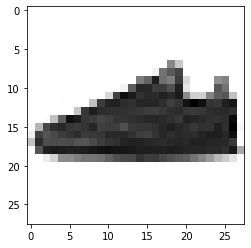

In [29]:
n=93
print('神經網路預測：',result[n])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')

# 檢查是否overfitting

In [30]:
test_loss, test_acc = model.evaluate(x_test,y_test2)

10000/10000 [==============================] - 1s 94us/sample - loss: 0.0212 - accuracy: 0.8521


In [31]:
print(f'測試損失：{test_loss}\n測試準確率: {test_acc}')

測試損失：0.021181612476706503
測試準確率: 0.8521000146865845


# 檢驗預測與實際答案答對比

In [32]:
import seaborn as sns

In [33]:
error=y_test-result

In [34]:
len(error[error!=0])

1479

In [35]:
print('正確率：',1-len(error[error!=0])/len(error),'%')

正確率： 0.8521 %
